In [1]:
suppressMessages(here::i_am('R_analysis/notebooks/Fig4_SSA_EVI_out_of_sample.ipynb'))
CODE = here::here()
source(glue::glue('{CODE}/R_analysis/init.R'))
local_load('analysis/ssa_evi_out_of_sample.R')
local_load('figures/ssa_out_of_sample.R')

Loading required package: pacman



In [2]:
out = data.frame()
for (source in c('era5', 'gmfd', 'cru')) {
    df = load_evi_panel(source)
    oos = run_evi_out_of_sample(df, num_iterations=1000)
    oos = oos |> mutate(source = !!source)
    out = bind_rows(out, oos)
}

`summarise()` has grouped output by 'region', 'id'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'region', 'id'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'region', 'id'. You can override using the `.groups` argument.


In [32]:
ttest = out |>
    mutate(rmse = (1 - rmse/baseline)*100) |>
    select(iteration, source, crop_station, rmse) |>
    spread(crop_station, rmse) |>
    group_by(source) |>
    summarize(p_value = t.test(unlist(only_not_stations), unlist(only_stations))$p.value,
         t_value = t.test(unlist(only_not_stations), unlist(only_stations))$statistic)

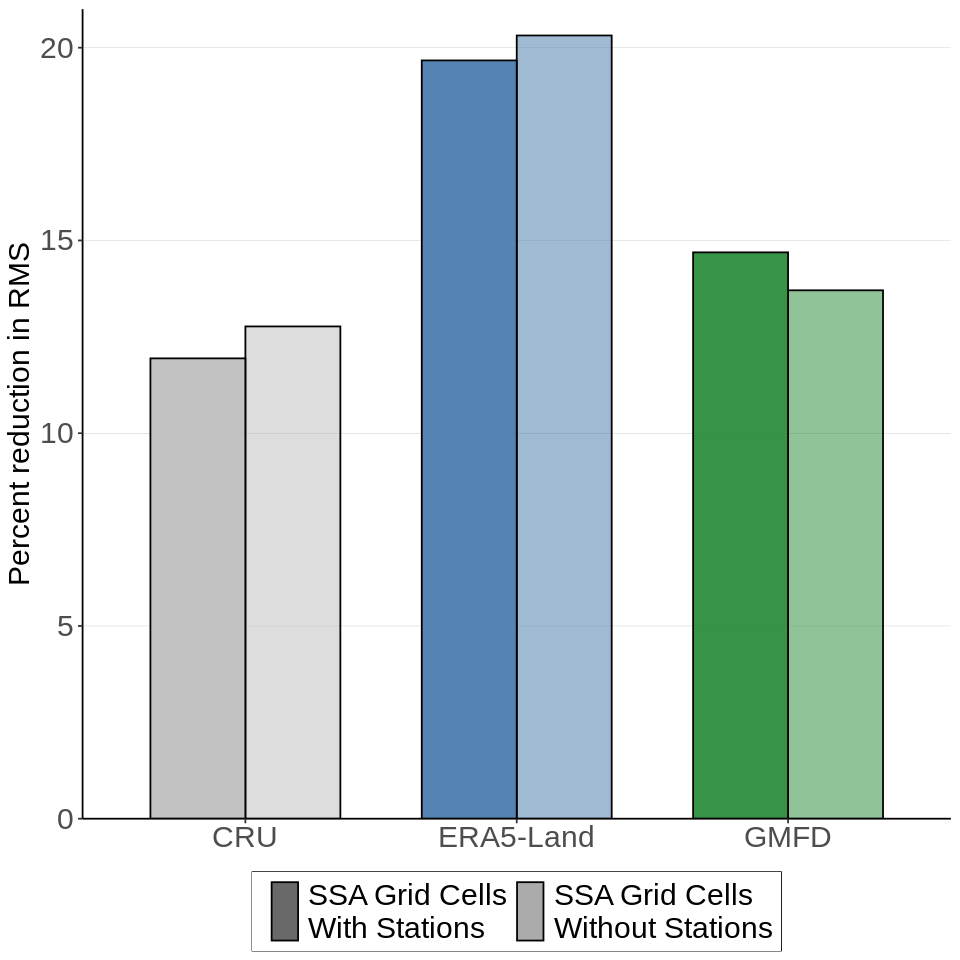

In [3]:
plot = plot_ssa_rms(out)
plot

In [4]:
ggsave(glue('{CODE}/results/figures/Fig4_out_of_sample_SSA.pdf'), plot=plot, width=8, height=8)